ANLY 580 | NLP | Wine Classifier Project

### Prep

In [2]:
# set working directory
import os
import sys
project_root = '/Users/kgedney/Documents/georgetown/anly580/anly580-wine-project'
os.chdir(project_root)

# ignore gensim warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
# install packages
import re
import gensim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
# load kaggle data from wine mag
df = pd.read_csv('data/winemag-data_first150k.csv', encoding='utf-8')

# load scraped data from wine cellar
df2 = pd.read_csv('data/cellarinsider_raw.csv')

#### Preprocess text data

In [5]:
# combine datasets
notes = list(df.description) + list(df2.note)
len(notes)

168643

In [6]:
# make lowercase and remove punctuation
cleantext = [n.lower() for n in notes]
cleantext = [re.sub('[^a-zA-Z0-9_]+', ' ', n) for n in cleantext]

In [7]:
# tokenize
documents = [n.split() for n in cleantext]

### Create Word Embeddings using Word2Vec algorithm (via gensim library)

- Unsupervised
- Based on all wine reviews available: Kaggle and the dataset scraped from Wine Cellar (scrape_wine_notes.py).   
- Using CBOW

https://radimrehurek.com/gensim/models/word2vec.html   
http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XArr1xNKhE4
https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456   

In [8]:
# define model 
model = gensim.models.Word2Vec(documents, 
                               size=128, 
                               window=5, 
                               min_count=1, 
                               workers=4)

In [9]:
# train model
model.train(documents, total_examples=len(documents), epochs=32)

(163793348, 226792224)

#### Analysis and Vector Math

In [10]:
model.wv.most_similar('oak')

[('wood', 0.6210969686508179),
 ('oaky', 0.5448319315910339),
 ('barrel', 0.5407615900039673),
 ('goodnight', 0.5315855741500854),
 ('woodsap', 0.466077983379364),
 ('char', 0.43894290924072266),
 ('vanillins', 0.42444759607315063),
 ('riviera', 0.4236244857311249),
 ('baguette', 0.42014995217323303),
 ('riojanos', 0.41101858019828796)]

In [11]:
# vector analogy
model.most_similar(positive=['rich', 'sweet'], negative=['pinot'])

[('ripe', 0.618861734867096),
 ('lush', 0.5685291886329651),
 ('fleshy', 0.5193815231323242),
 ('luscious', 0.5149255394935608),
 ('generous', 0.49804186820983887),
 ('thick', 0.48750147223472595),
 ('coated', 0.48237890005111694),
 ('juicy', 0.4790699779987335),
 ('soft', 0.4717113971710205),
 ('dense', 0.4615198075771332)]

In [14]:
# vector math
model.most_similar(positive=['chardonnay'], negative=['oak', 'oaky'], topn=5)

[('erbaluce', 0.45025962591171265),
 ('riesling', 0.4480070471763611),
 ('vermentino', 0.42926862835884094),
 ('pigato', 0.4165061116218567),
 ('falanghina', 0.4145151972770691)]

In [15]:
model.wv.most_similar(positive=['chardonnay', 'red'], negative=['oak'], topn=10)

[('chard', 0.45134061574935913),
 ('ros', 0.4321877360343933),
 ('riesling', 0.42168277502059937),
 ('roditis', 0.41355106234550476),
 ('white', 0.38933348655700684),
 ('yellow', 0.3857743740081787),
 ('moschofilero', 0.36691007018089294),
 ('abracadabra', 0.36062636971473694),
 ('albari', 0.346504271030426),
 ('cheerfully', 0.3424265384674072)]

In [16]:
model.wv.most_similar(positive=['cranberry'], topn=10)

[('pomegranate', 0.7515219449996948),
 ('strawberry', 0.6734119653701782),
 ('rhubarb', 0.6730139255523682),
 ('raspberry', 0.5669833421707153),
 ('red', 0.5441116094589233),
 ('blueberry', 0.5351760387420654),
 ('huckleberry', 0.5176119208335876),
 ('boysenberry', 0.5172138214111328),
 ('cherry', 0.5156388878822327),
 ('cranberries', 0.507044792175293)]

In [19]:
model.wv.most_similar(positive=['sweet'], topn=5)

[('coated', 0.5336571335792542),
 ('jammy', 0.5147214531898499),
 ('sweetened', 0.5096281170845032),
 ('ripe', 0.5069876909255981),
 ('overripe', 0.47989553213119507)]

In [16]:
# save vectors
X = model[model.wv.vocab]

In [17]:
# create dataframe
df_vectors = pd.DataFrame(X)
df_vectors['word'] = list(model.wv.vocab.keys())

In [18]:
# save dataframe
df_vectors.to_csv('wine_wv.csv')

In [19]:
#pd.DataFrame(X).to_csv('wine_wv.tsv', header=None, sep='\t', index=False)
#pd.DataFrame({"word" : list(model.wv.vocab.keys())}).to_csv('wine_labels.tsv', index=False, header=False)

#### Basic tSNE Plot

In [20]:
# fit to tSNE (sklearn version)
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

In [21]:
# ref: https://github.com/DmitryUlyanov/Multicore-TSNE

In [22]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=2, n_jobs=4)
Y = tsne.fit_transform(X)

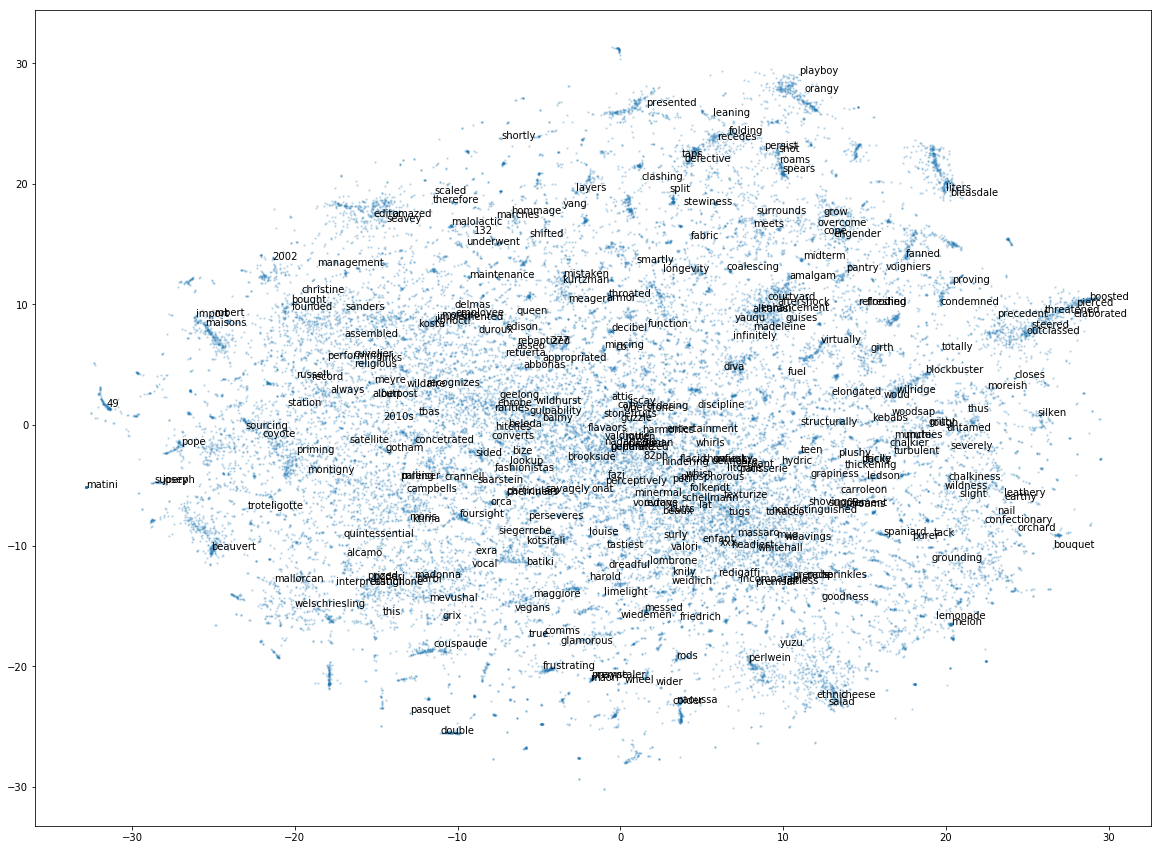

In [23]:
# plot tsne
plt.figure(figsize=(20,15))
plt.scatter(Y[:,0], Y[:,1], s=2, alpha=0.2)

for i, txt in enumerate(df_vectors.word):
    if not i % 101:
        plt.annotate(txt, (Y[i,0], Y[i,1]))

plt.show()

#### Interactive plot with Bokeh

In [ ]:
# https://projector.tensorflow.org/

In [24]:
from bokeh.plotting import figure, show, ColumnDataSource, save
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [25]:
source = ColumnDataSource(data=dict(
    x = Y[:,0],
    y = Y[:,1],
    word = list(df_vectors.word),
))

In [26]:
# set source
source = ColumnDataSource(data=dict(
    x = Y[:,0],
    y = Y[:,1],
    word = list(df_vectors.word),
))


# add hover
TOOLTIPS = [
    ("word", "@word")
]


# set figure
p = figure(plot_width=800, plot_height=600, tooltips=TOOLTIPS, title = 'Wine Word Embeddings (tSNE)')

# add a circle renderer with a size, color, and alpha
p.circle(x = 'x', 
         y = 'y', 
         source = source,
         size = 2, 
         color = "navy", 
         alpha = 0.25)

# show the results
show(p)


In [27]:
# save as html file
save(p, filename='interactive_tsne.html', title='Wine Words: Interactive tSNE')

/Users/kgedney/anaconda/lib/python3.6/site-packages/bokeh/io/saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")


'/Users/kgedney/Documents/georgetown/anly580/anly580-wine-project/interactive_tsne.html'